**MLS Case Study: Unsupervised Learning**

**Problem Statement**:
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved.
Based on this input, the Marketing Team proposes to run personalised campaigns to target new customers as well as upsell to existing customers.
Another insight from the market research was that the customers perceive the support services of the bank poorly.
Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

**Objective**
Identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

** Data**
- Sl_no: Customer Serial Number
- Customer Key: Customer Identification
- Avg_Credit_Limit: Average credit limit (currency is not specified, you can make an assumption around this)
- Total_Credits_Cards: Total # of credit cards
- Total_visits_bank: Total bank visits
- Total_visits_online: Total online visits
- Total_calls_made: Total calls made

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

In [4]:
!pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 5.1 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
data = pd.read_excel('./data/Credit+Card+Customer+Data.xlsx')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Data Analysis**

Descriptive Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                655 non-null    int64
 1   Customer Key         655 non-null    int64
 2   Avg_Credit_Limit     655 non-null    int64
 3   Total_Credit_Cards   655 non-null    int64
 4   Total_visits_bank    655 non-null    int64
 5   Total_visits_online  655 non-null    int64
 6   Total_calls_made     655 non-null    int64
dtypes: int64(7)
memory usage: 35.9 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,655.0,329.450382,190.788562,1.0,164.5,328.0,494.5,660.0
Customer Key,655.0,55058.158779,25606.965469,11265.0,33623.5,53898.0,77084.5,99843.0
Avg_Credit_Limit,655.0,34242.748092,37240.896986,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.691603,2.169325,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.401527,1.633648,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.606107,2.940380,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.601527,2.867352,0.0,1.0,3.0,5.0,10.0


Missing Data

In [9]:
(data.isnull().sum()/data.shape[0])*100

Sl_No                  0.0
Customer Key           0.0
Avg_Credit_Limit       0.0
Total_Credit_Cards     0.0
Total_visits_bank      0.0
Total_visits_online    0.0
Total_calls_made       0.0
dtype: float64

Duplicated Entries

In [10]:
data[data.duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


Checking for variable distribution and outliers

Sl_No
Skew 0.008043695076056593


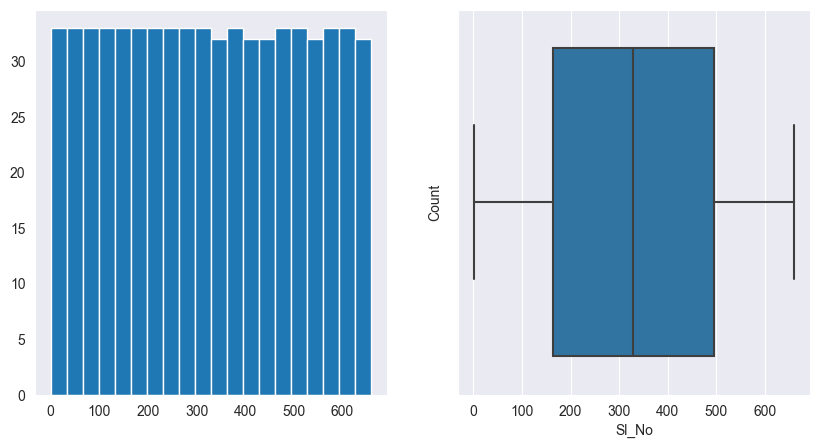

Customer Key
Skew 0.04851951125059306


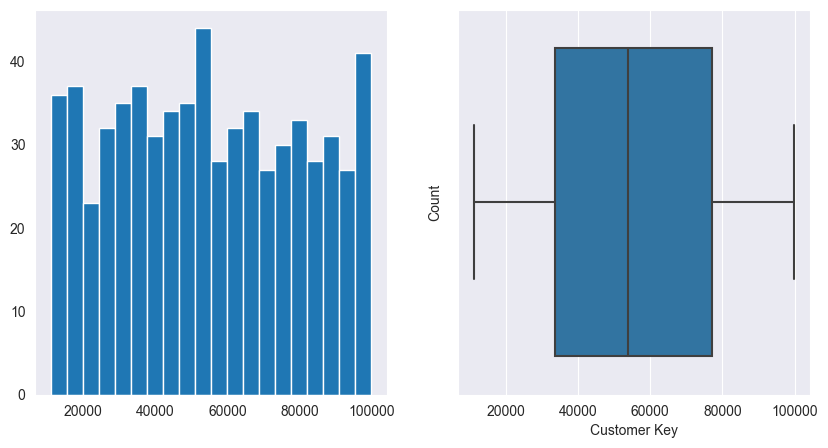

Avg_Credit_Limit
Skew 2.2086048601272767


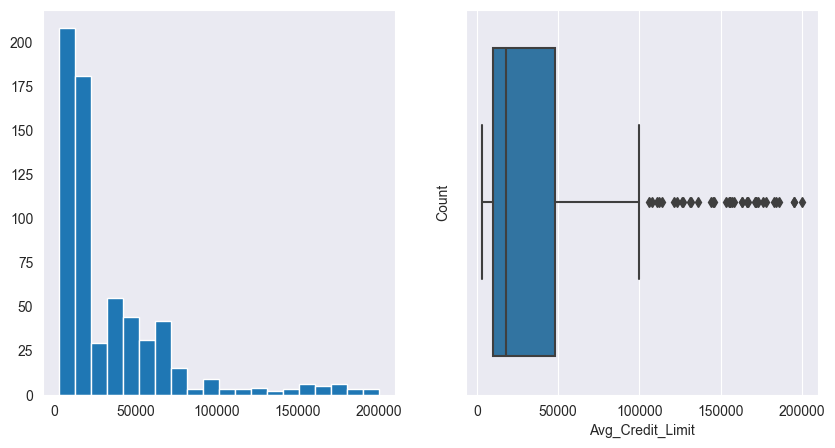

Total_Credit_Cards
Skew 0.15965310057752927


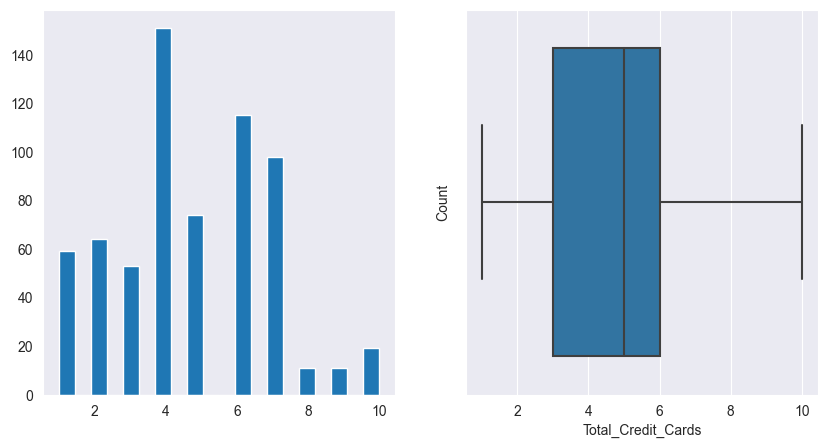

Total_visits_bank
Skew 0.1400539733619209


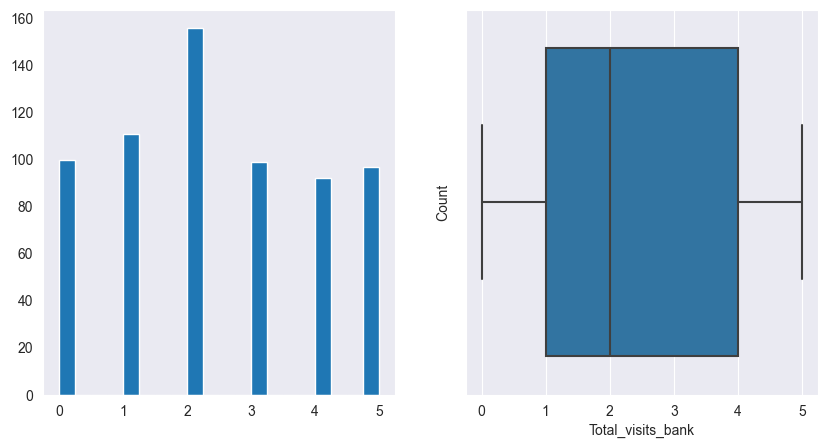

Total_visits_online
Skew 2.2273991031727256


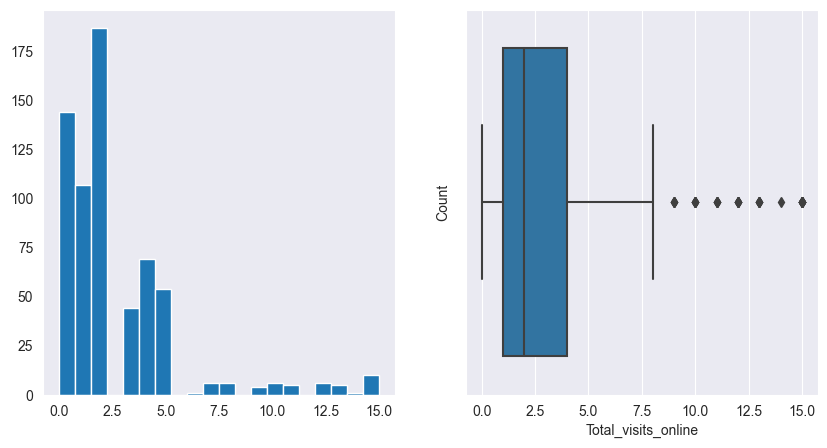

Total_calls_made
Skew 0.6502130826102577


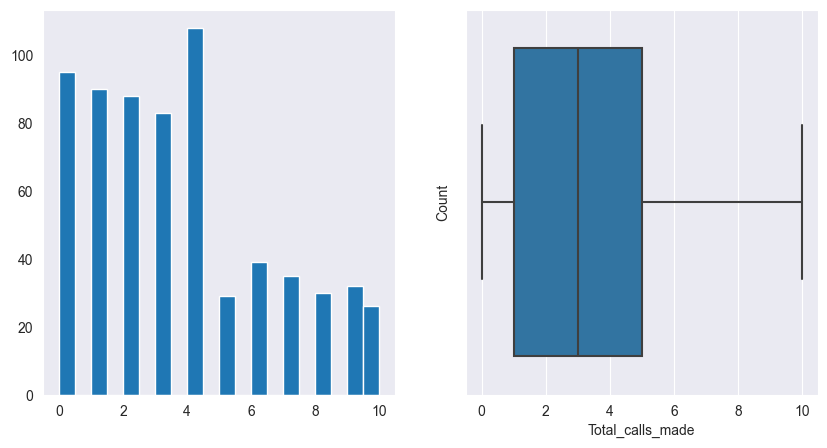

In [11]:
for col in data.columns:
    print(col)
    print('Skew', data[col].skew())
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    data[col].hist(bins=20, grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.ylabel('Count')
    plt.show()

In [12]:
# There are variables that are not critical for the model, so we are going to drop it.
data.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

Scaling the Data

In [13]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled_copy = data_scaled.copy()

# Finding the right # of clusters

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

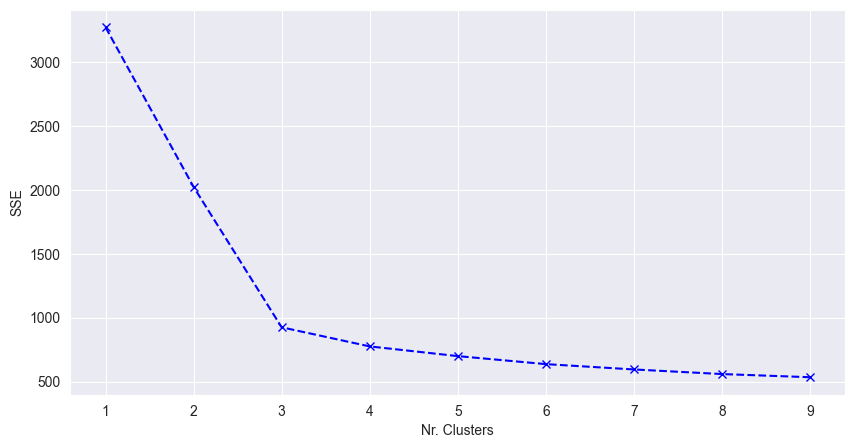

In [18]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

#Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), sse.values(), 'bx--')
plt.xlabel('Nr. Clusters')
plt.ylabel('SSE')
plt.show()

Silhouete Score

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

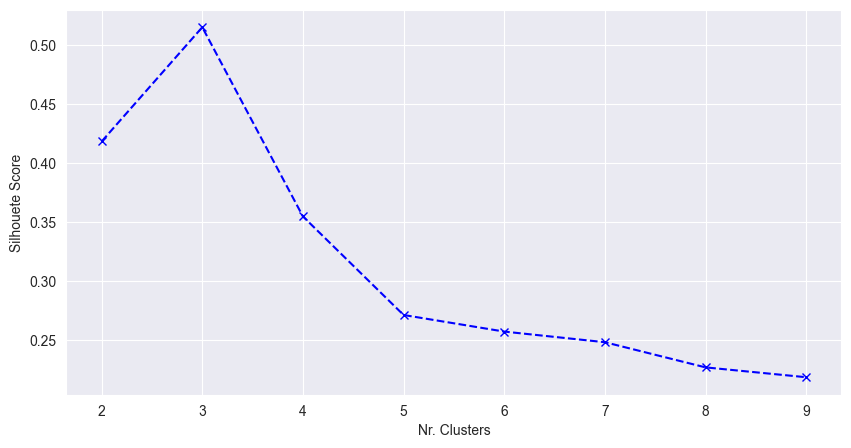

In [20]:
sc = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

plt.figure(figsize=(10, 5))
plt.plot(list(sc.keys()), list(sc.values()), 'bx--')
plt.xlabel('Nr. Clusters')
plt.ylabel('Silhouete Score')
plt.show()


In [21]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(data_scaled)
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'].value_counts()

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    382
0    224
2     49
Name: KMeans_Labels, dtype: int64

In [22]:
#Mean, Median
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['Group0_Mean', 'Group1_Mean', 'Group2_Mean', 'Group1_Median', 'Group2_Median', 'Group3_Median']
df_kmeans.T

,Group0_Mean,Group1_Mean,Group2_Mean,Group1_Median,Group2_Median,Group3_Median
Avg_Credit_Limit,12174.107143,33604.712042,140102.040816,12000.0,31000.0,145000.0
Total_Credit_Cards,2.410714,5.505236,8.775510,2.0,6.0,9.0
Total_visits_bank,0.933036,3.494764,0.591837,1.0,3.0,1.0
Total_visits_online,3.553571,0.976440,10.979592,4.0,1.0,11.0
Total_calls_made,6.870536,2.005236,1.102041,7.0,2.0,1.0


Cluster Analysis

- **Cluster 0**: Focus on credit card customers that have an average credit limit of 12174 euros or dollars. Focus on credit card customers that have at least 2 credit cards, and frequently visit online instead of the bank. There are at least 7 calls made to the bank.

- **Cluster 1**: Focus on credit card customers that in average credit limit of 33604 euros or dollars. Focus on credit card customers that have at least 5 credit cards, and frequently visit more physical than online, and have less made calls to the bank.

- **Cluster 2**: Focus on credit card customers that in average have a credit limit of 140102 dollars or euros. Has at least 9 credit cards, and does more visits online than through the bank and have less calls than the previous clusters.

In [25]:
kmedo = KMedoids(n_clusters=3, random_state=1).fit(data_scaled)

data_scaled_copy['KMedoids_Labels'] = kmeans.predict(data_scaled)
data['KMedoids_Labels'] = kmeans.predict(data_scaled)

data['KMedoids_Labels'].value_counts()

1    382
0    224
2     49
Name: KMedoids_Labels, dtype: int64

In [29]:
original_features = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]
mean = data.groupby('KMedoids_Labels').mean()
median = data.groupby('KMedoids_Labels').median()

df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['Group0_Mean', 'Group1_Mean', 'Group2_Mean', 'Group0_Median', 'Group1_Median', 'Group2_Median']
df_kmedoids[original_features].T

,Group0_Mean,Group1_Mean,Group2_Mean,Group0_Median,Group1_Median,Group2_Median
Avg_Credit_Limit,12174.107143,33604.712042,140102.040816,12000.0,31000.0,145000.0
Total_Credit_Cards,2.410714,5.505236,8.775510,2.0,6.0,9.0
Total_visits_bank,0.933036,3.494764,0.591837,1.0,3.0,1.0
Total_visits_online,3.553571,0.976440,10.979592,4.0,1.0,11.0
Total_calls_made,6.870536,2.005236,1.102041,7.0,2.0,1.0
